## Data visualization

Standard data preprocessing and visualization

In [1]:
import numpy as np
import pandas as pd
from pylev import wfi_levenshtein
from tqdm import tqdm

from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.preprocessing import scale
from sklearn.svm import SVR, SVC

%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
titanium = pd.read_csv('titanium.csv', sep=',')
print('Dataset: \n', titanium.head(), '\n')
print('Basic info')
print(titanium.describe())

Dataset: 
      x      y
0  585  0.644
1  595  0.622
2  605  0.638
3  615  0.649
4  625  0.652 

Basic info
                 x          y
count    49.000000  49.000000
mean    825.000000   0.804592
std     142.886902   0.375022
min     585.000000   0.601000
25%     705.000000   0.627000
50%     825.000000   0.663000
75%     945.000000   0.730000
max    1065.000000   2.169000


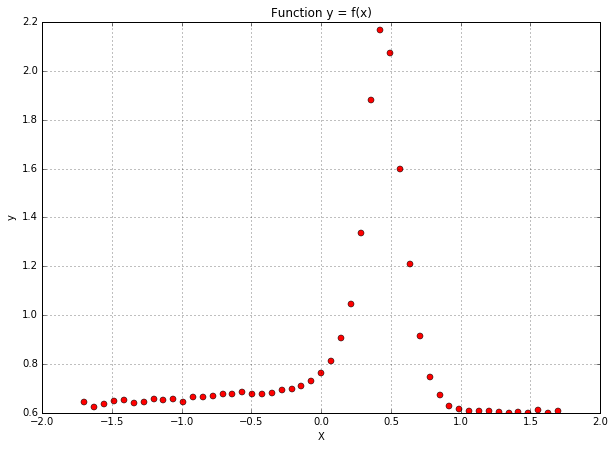

In [2]:
X, y = titanium['x'], titanium['y']

# Scaling samples for computation simplicity
X = scale(X.reshape(-1,1))

plt.figure(figsize=(10,7))
plt.plot(X, y, 'ro')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Function y = f(x)')
plt.grid(True)
plt.show()

## Model fitting

There are 3 kernels: 
* Linear
* Polynomial (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Let's set `epsilon=0.01` for all cases

For each kernel:
1. Plot error dependancy with parameter $C$ ($C$ axis will be scaled logarithmically). Error is mean absolute error. 
2. For best parameter $C$ plot data and SVM predictions.

C =  0.01
0.176766233792
C =  0.0278255940221
0.176767470701
C =  0.0774263682681
0.17676747084
C =  0.215443469003
0.176766234333
C =  0.599484250319
0.176766235343
C =  1.6681005372
0.176766238159
C =  4.64158883361
0.176767483466
C =  12.9154966501
0.176767506282
C =  35.938136638
0.176766328423
C =  100.0
0.176766497156


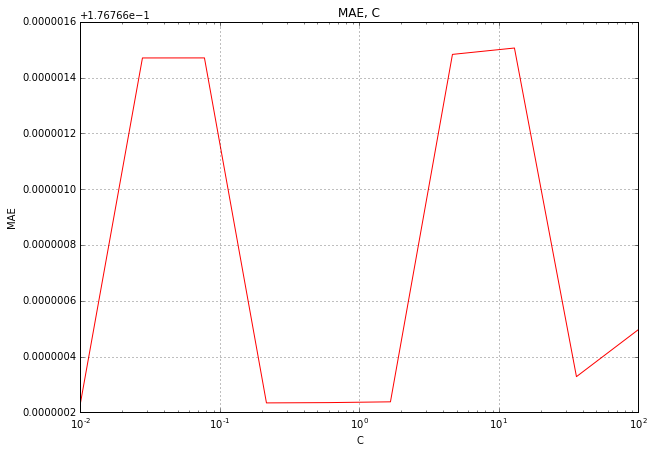

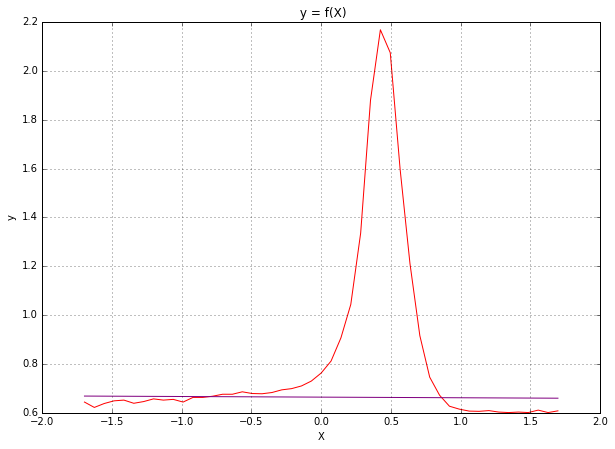

In [29]:
C_options = np.logspace(-2, 2, 10)

MAE_linear = []

for c in C_options:
    svr_linear = SVR(C=c, kernel='linear', epsilon=0.01)
    svr_linear.fit(X,y)
    y_predicted = svr_linear.predict(X)
    MAE = mean_absolute_error(
            y,
            y_predicted
        ) 
    MAE_linear.append(MAE)
    
    # Evaluating current C as best
    # by picking smallest corresponding MAE
    if C_min is None or MAE < np.array(MAE_linear).min():
        C_min = svr_linear.C
    print('C = ', svr_linear.C)
    print(MAE)
    

plt.figure(figsize=(10,7))
plt.plot(C_options, MAE_linear, 'red')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('MAE')
plt.title('MAE, C')
plt.grid(True)
plt.show()

y_predicted = SVR(C=C_min, \
                  kernel='linear', epsilon=0.01).\
                  fit(X,y).predict(X)
plt.figure(figsize=(10,7))
plt.plot(X, y, 'red')
plt.plot(X, y_predicted, 'purple')
plt.xlabel('X')
plt.ylabel('y')
plt.title(' y = f(X)')
plt.grid(True)
plt.show()

C =  0.01
0.154083058517
C =  0.0278255940221
0.154166257802
C =  0.0774263682681
0.154134206011
C =  0.215443469003
0.154167257019
C =  0.599484250319
0.154135935448
C =  1.6681005372
0.154212997076
C =  4.64158883361
0.154221745537
C =  12.9154966501
0.154222566682
C =  35.938136638
0.1541572226
C =  100.0
0.155253810402


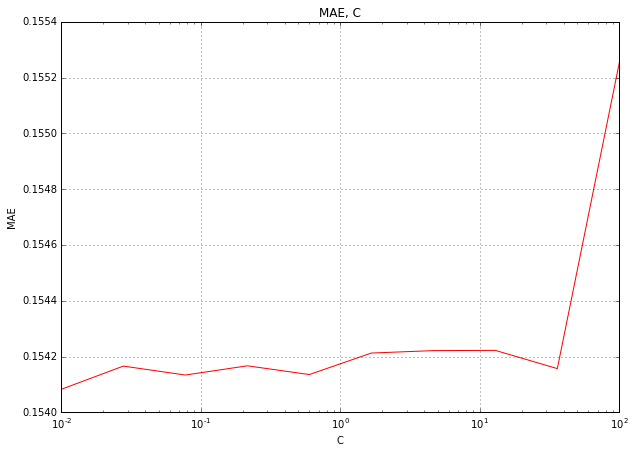

0.01


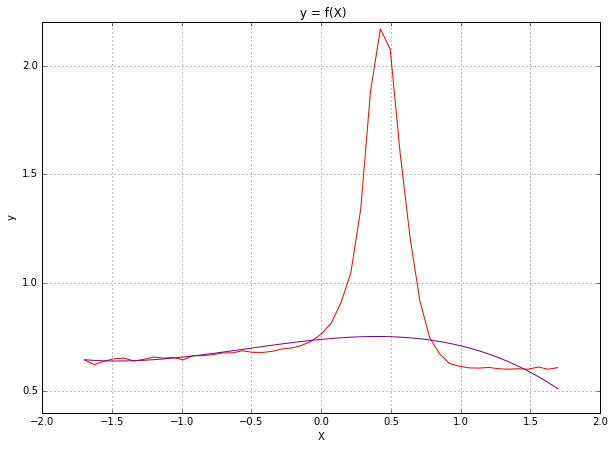

In [34]:
C_options = np.logspace(-2, 2, 10)

MAE_poly = []
C_min = None
for c in C_options:
    svr_poly = SVR(C=c, kernel='poly', epsilon=0.01, degree=3, gamma=6, coef0=1)
    svr_poly.fit(X,y)
    y_predicted = svr_poly.predict(X)
    MAE = mean_absolute_error(
            y,
            y_predicted
        ) 
    MAE_poly.append(MAE)
    if C_min is None or MAE < np.array(MAE_poly).min():
        C_min = svr_poly.C
    print('C = ', svr_poly.C)
    print(MAE)
    
plt.figure(figsize=(10,7))
plt.plot(C_options, MAE_poly, 'red')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('MAE')
plt.title('MAE, C')
plt.grid(True)
plt.show()

print(C_min)
y_predicted = SVR(C=C_min, kernel='poly', \
                  epsilon=0.01, degree=3, gamma=6, coef0=1).\
                  fit(X,y).predict(X)
plt.figure(figsize=(10,7))
plt.plot(X, y, 'red')
plt.plot(X, y_predicted, 'purple')
plt.xlabel('X')
plt.ylabel('y')
plt.title(' y = f(X)')
plt.grid(True)
plt.show()

C =  0.01
0.142148791357
C =  0.0278255940221
0.119141971686
C =  0.0774263682681
0.0913253533375
C =  0.215443469003
0.0708906807779
C =  0.599484250319
0.0497805766967
C =  1.6681005372
0.0418112510399
C =  4.64158883361
0.0325526077236
C =  12.9154966501
0.0271581308507
C =  35.938136638
0.0235015840623
C =  100.0
0.0209330691791


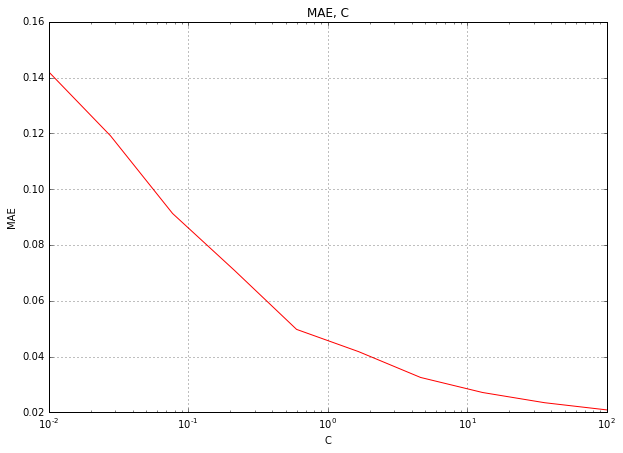

0.01


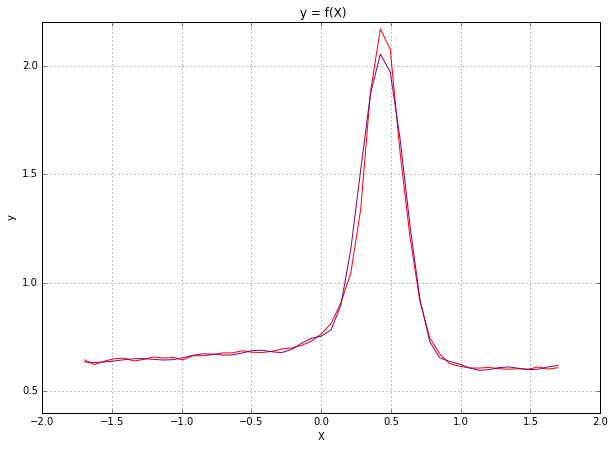

In [41]:
С_options = np.logspace(-2, 2, 10)
MAE_rbf = []
C_min = None
MAE = None
for c in С_options:
    svr_rbf = SVR(C=c, kernel='rbf', epsilon=0.01, gamma=6, coef0=1)
    svr_rbf.fit(X,y)
    y_predicted = svr_rbf.predict(X)
    MAE = mean_absolute_error(
            y,
            y_predicted
        ) 
    MAE_rbf.append(MAE)
    if C_min is None or MAE < np.array(MAE_rbf).min():
        C_min = svr_rbf.C
    print('C = ', svr_rbf.C)
    print(MAE)
    
plt.figure(figsize=(10,7))
plt.plot(С_options, MAE_rbf, 'red')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('MAE')
plt.title('MAE, C')
plt.grid(True)
plt.show()

y_predicted = SVR(C=C_min, kernel='rbf', \
                  epsilon=0.01, gamma=6, coef0=1).\
                  fit(X,y).predict(X)
plt.figure(figsize=(10,7))
plt.plot(X, y, 'red')
plt.plot(X, y_predicted, 'purple')
plt.xlabel('X')
plt.ylabel('y')
plt.title(' y = f(X)')
plt.grid(True)
plt.show()

In [42]:
# Getting best MAE and C
MAE_result = MAE_linear + MAE_poly + MAE_rbf
print('Minimum MAE is', np.array(MAE_result).min())

Minimum MAE is 0.0209330691791


Which is derived from RBF kernel with C=100

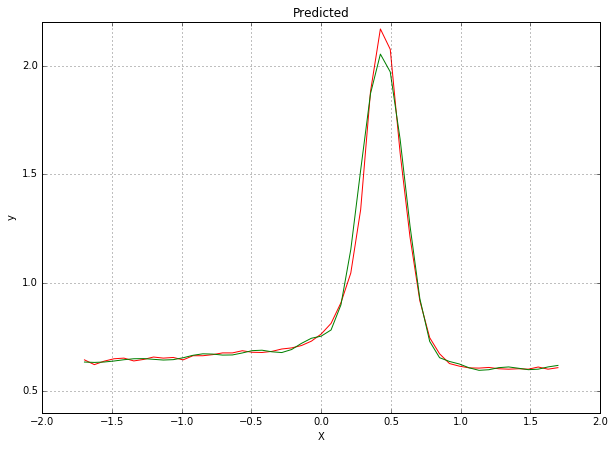

In [43]:
clf = SVR(C=100, kernel='rbf', epsilon=0.01, gamma=6, coef0=1)
clf.fit(X, y)
y_predicted = clf.predict(X)

plt.figure(figsize=(10,7))
plt.plot(X, y, 'red')
plt.plot(X, y_predicted, 'green')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Predicted')
plt.grid(True)
plt.show()

# Language detection

This task implies detecting language of a given word.
There are 2 texts: sentences from "War and Peace" in English and Spanish, split into words.

## Data loading

Load data from *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
Data should be in format of pandas.DataFrame with columns *index* | *word* | *label*, where *index* - pandas dataframe index, *word* - is a given word and *label* - target variable (0 or 1)

In [44]:
df_en = pd.read_csv('war_and_peace_en.txt', names=['word', 'label'])
df_en['label'] = '0'
df_es = pd.read_csv('war_and_peace_es.txt', names=['word', 'label'])
df_es['label'] = '1'
df = pd.concat([df_en, df_es])
print(df.head())
print(df.shape)

# ESP = 1 
# ENG = 0

      word label
0      war     0
1      and     0
2    peace     0
3      leo     0
4  tolstoy     0
(11403, 2)


In [45]:
df.head()

,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


## Data preprocessing

Characteristic of a custom kernel in sklearn.SVC is a requirement to receive data as vectors of digits.<br/>
This time the vectors are indices of corresponding words from corpus. This means that instead of a vector ['treat', 'celebrit', 'prince', ...] there will be a vector [9209, 11145, 7735, ...].

Before building a kernel data should be prepared. The steps are:
1. Set RND_SEED, which will be used in order to have the same random activities each time.
2. Shuffle and reindex data table, use methods df.sample() and df.reset_index()
3. Kernel computation can take a long time, thus table may be reduced in size
4. Split data into train and test datasets as 60/40

In [46]:
RND_SEED = 1234

# Shuffling whole dataset
df = df.sample(frac=1).reset_index(drop=True)[:1000]
df.head()

,word,label
0,with,0
1,his,0
2,looked,0
3,che,1
4,con,1


In [47]:
train, test = train_test_split(df, test_size=0.4, random_state=RND_SEED)
X_train = np.array(train.index).reshape(-1,1)
X_test = np.array(test.index).reshape(-1,1)
y_train = train.label
y_test = test.label

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(600, 1)
(600,)
(400, 1)
(400,)


## Kernel computation

It's time to build own kernel for strings classification. For string comparison [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance) may be used. 

Kernel has to return max value when words are the same and min value when the words are totally different. This is opposite of Levenshtein distance property: it equals to 0 when words are the same and peaks when words are absolutely different. Levenshtein kernel value may be used with Gaussian kernel, for example, as we need this to depend on distance, but any related function is ok.

In [60]:
def gaussian_kernel(x1,x2):
    sigma = 0.5
    return np.exp(-np.sum((x1-x2)**2)/(2*sigma**2))

# Take 2 matrices
def string_kernel(U, V):    
        
    # Reshaping matrices into 1-D vector
    U = U.flatten()
    V = V.flatten()
    
    #Initializing result matrix
    G = np.empty([U.shape[0], V.shape[0]])
    
    # Returning resulting values as in the description: G = K(Ui, Vj)
    # G.shape = (U.shape[0], V.shape[0]) or simply n_samples X n_samples
    for i in tqdm(range(U.shape[0])):
        for j in range(V.shape[0]):
            G[i, j] = int(wfi_levenshtein(df.iloc[U[i,]].word, df.iloc[V[j, ]].word))
            
    # "Inverse" of matrix values:
    # min -> max
    # max -> min
    # It seems to work better and faster than exponential Gauss kernel
    maximum = np.max(G)
    G = maximum - G
    return G
    

svc = SVC(kernel=string_kernel)
svc.fit(X_train, y_train)

y_predicted = svc.predict(X_train)
print("Accuracy is ", accuracy_score(y_train,y_predicted))

100%|████████████████████████████████████████| 600/600 [01:15<00:00,  8.21it/s]

Accuracy is  0.735


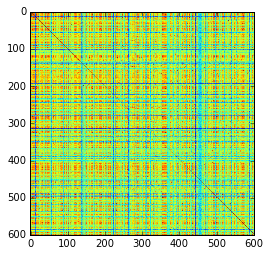

In [52]:
plt.imshow(string_kernel(X_train, X_train))

Seems this matrix is symmetrical. It is simply explained as X and Y axis are same - [i,j] = [j,i]

## Quality validation

SVM should be fitted with different penalty parameter $C$.<br/>
For each value display accuracy on train and test set.

In [64]:
С_options = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 2.5, 3]
for c in С_options:
    svc = SVC(C=c, kernel=string_kernel)
    svc.fit(X_train, y_train)
    y_predicted = svc.predict(X_train)
    print("Accuracy is %s when C = %s on training dataset" %(accuracy_score(y_train, y_predicted), c))
    y_predicted = svc.predict(X_test)
    print("Accuracy is %s when C = %s on test dataset" %(accuracy_score(y_test, y_predicted), c))

100%|████████████████████████████████████████| 400/400 [00:57<00:00,  7.54it/s]

Accuracy is 0.546666666667 when C = 0.001 on training dataset
Accuracy is 0.5425 when C = 0.001 on test dataset


100%|████████████████████████████████████████| 600/600 [01:15<00:00,  8.11it/s]


Accuracy is 0.615 when C = 0.005 on training dataset


100%|████████████████████████████████████████| 400/400 [00:50<00:00,  8.29it/s]


Accuracy is 0.595 when C = 0.005 on test dataset


100%|████████████████████████████████████████| 600/600 [01:18<00:00,  8.32it/s]


Accuracy is 0.791666666667 when C = 0.01 on training dataset


100%|████████████████████████████████████████| 400/400 [00:50<00:00,  8.32it/s]


Accuracy is 0.775 when C = 0.01 on test dataset


100%|████████████████████████████████████████| 600/600 [01:20<00:00,  8.32it/s]


Accuracy is 0.85 when C = 0.05 on training dataset


100%|████████████████████████████████████████| 400/400 [00:53<00:00,  7.44it/s]


Accuracy is 0.8125 when C = 0.05 on test dataset


100%|████████████████████████████████████████| 600/600 [01:23<00:00,  6.69it/s]


Accuracy is 0.783333333333 when C = 0.1 on training dataset


100%|████████████████████████████████████████| 400/400 [00:51<00:00,  7.98it/s]


Accuracy is 0.735 when C = 0.1 on test dataset


100%|████████████████████████████████████████| 600/600 [01:22<00:00,  8.23it/s]


Accuracy is 0.736666666667 when C = 0.5 on training dataset


100%|████████████████████████████████████████| 400/400 [00:57<00:00,  8.17it/s]


Accuracy is 0.6825 when C = 0.5 on test dataset


100%|████████████████████████████████████████| 600/600 [01:27<00:00,  7.96it/s]


Accuracy is 0.735 when C = 1 on training dataset


100%|████████████████████████████████████████| 400/400 [00:54<00:00,  8.18it/s]


Accuracy is 0.6675 when C = 1 on test dataset


100%|████████████████████████████████████████| 600/600 [01:21<00:00,  8.41it/s]


Accuracy is 0.73 when C = 2 on training dataset


100%|████████████████████████████████████████| 400/400 [00:50<00:00,  8.18it/s]


Accuracy is 0.6625 when C = 2 on test dataset


100%|████████████████████████████████████████| 600/600 [01:21<00:00,  8.29it/s]


Accuracy is 0.733333333333 when C = 2.5 on training dataset


100%|████████████████████████████████████████| 400/400 [00:53<00:00,  8.13it/s]


Accuracy is 0.6625 when C = 2.5 on test dataset


100%|████████████████████████████████████████| 600/600 [01:22<00:00,  7.24it/s]


Accuracy is 0.733333333333 when C = 3 on training dataset


100%|████████████████████████████████████████| 400/400 [00:56<00:00,  7.18it/s]


Accuracy is 0.6625 when C = 3 on test dataset
